# Analysis of Test Metrics

This notebook analyzes the relationship between inventory sums and action sums from test trajectories.

In [1]:
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from glob import glob
import numpy as np
# increase the number of columns displayed
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
# from sklearn import linear_model
# from plotter import *
# from ipywidgets import *
# import statsmodels.api as sm
# from plotter import *
# from matplotlib.ticker import StrMethodFormatter
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# from matplotlib.lines import Line2D
# import scipy.stats as stats



In [2]:
def load_metrics_files(date=None, filename=None, base_path='../metrics/test_trajectories'):
    """
    Load metrics files from the specified path
    
    Args:
        date (str): Date in format 'YYYY_MM_DD'. If None, uses latest date
        filename (str, optional): Specific filename to load. If None, loads latest file from date
        base_path (str): Base path for metrics files
    """
    if date is None:
        # Get all date folders and select the latest
        date_folders = glob(os.path.join(base_path, '*_*_*'))
        if not date_folders:
            raise ValueError("No date folders found")
        date = max(os.path.basename(folder) for folder in date_folders)
    
    # Construct path with date
    date_path = os.path.join(base_path, date)
    
    if filename:
        # Load specific file
        metrics_files = [os.path.join(date_path, filename)]
    else:
        # Find all CSV files for the date and get the latest one
        metrics_files = glob(os.path.join(date_path, '**', '*_test_metrics.csv'), recursive=True)
        if not metrics_files:
            raise ValueError(f"No metrics files found for date {date}")
        metrics_files = [max(metrics_files, key=os.path.getctime)]
    
    # Read and concatenate all CSV files
    dfs = []
    for file_path in metrics_files:
        if os.path.exists(file_path):
            print(f"Loading metrics from: {file_path}")
            df = pd.read_csv(file_path)
            dfs.append(df)
        else:
            print(f"File not found: {file_path}")
    
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()



# Load specific file from specific date
# df = load_metrics_files(date='2024_02_14', filename='model123_test_metrics.csv')

# Load latest file from latest date
# df = load_metrics_files()

In [3]:
# Example usage:
# Load latest file from specific date
# df = load_metrics_files(date='2025_02_14')
df = load_metrics_files(date='2025_03_18', filename='one_store_fixed_costs/hybrid_policy/1742319349_876_test_data.csv')
# df = load_metrics_files(date='2025_03_11', filename='one_store_fixed_costs/hybrid_policy/1741734767_249_test_data.csv')
# df = load_metrics_files(date='2025_03_10', filename='one_store_fixed_costs/hybrid_policy/1741641791_81_test_data.csv')
# df = load_metrics_files(date='2025_03_07', filename='one_store_fixed_costs/hybrid_policy/1741405593_624_test_data.csv')
# df = load_metrics_files(date='2025_03_06', filename='one_store_fixed_costs/hybrid_policy/1741242921_461_test_data.csv')
# df = load_metrics_files(date='2025_03_05', filename='one_store_fixed_costs/hybrid_policy/1741236758_234_test_data.csv')
# df = load_metrics_files(date='2025_03_05', filename='one_store_fixed_costs/hybrid_policy/1741205699_438_test_data.csv')
# df = load_metrics_files(date='2025_03_05', filename='one_store_fixed_costs/hybrid_policy/1741212087_313_test_data.csv')
# df = load_metrics_files(date='2025_03_05', filename='one_store_fixed_costs/hybrid_policy/1741207298_293_test_data.csv')
# df = load_metrics_files(date='2025_03_04', filename='one_store_fixed_costs/hybrid_policy/1741103211_609_test_data.csv')
# df = load_metrics_files(date='2025_03_03', filename='one_store_fixed_costs/hybrid_policy/1741027502_875_test_data.csv')
# df = load_metrics_files(date='2025_03_03', filename='one_store_fixed_costs/hybrid_policy/1741027503_554_test_data.csv')
# df = load_metrics_files(date='2025_03_03', filename='one_store_fixed_costs/hybrid_policy/1741018361_69_test_data.csv')
# df = load_metrics_files(date='2025_03_03', filename='one_store_fixed_costs/hybrid_policy/1741018361_69_test_data_raw.pt')
# df = load_metrics_files(date='2025_03_02', filename='one_store_fixed_costs/hybrid_policy/1740967706_828_test_data.pt')
# df = load_metrics_files(date='2025_03_03', filename='one_store_fixed_costs/hybrid_policy/1741011238_374_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739983192_910_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739983192_74_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739989165_590_test_metrics.csv')
# sort by batch_idx then by time_step
df = df.sort_values(by=['batch_idx', 'time_step'])
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739815253_test_metrics.csv')
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739810390_test_metrics.csv')
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739776323_test_metrics.csv')
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739779365_test_metrics.csv')
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739776205_test_metrics.csv')
# df = load_metrics_files(date='2025_02_16', filename='one_store_fixed_costs/hybrid_policy/1739768092_test_metrics.csv')
# /user/ma4177/Exp_neural/metrics/test_trajectories/2025_02_17/one_store_fixed_costs/hybrid_policy/1739779638_test_metrics.csv
df.head()

# len(df)

Loading metrics from: ../metrics/test_trajectories/2025_03_18/one_store_fixed_costs/hybrid_policy/1742319349_876_test_data.csv


,time_step,batch_idx,inventory_on_hand,inventory_sum,discrete_action_index,total_action,continuous,discrete,continuous_mean,continuous_log_std,continuous_values
25,0,0,0.000000,0.000000,1,32.703300,"(0.5226458, 0.40527037, -0.0032013012, -0.0055...","(-44.15876, -38.53205)","(0.5226458, 0.40527037)","(0.53278583, -0.22697723)","(-2.2409731e-06, 32.7033)"
125,1,0,-13.000000,19.703300,0,0.000000,"(0.5545204, 0.045933105, -0.003473383, -0.0082...","(-41.545937, -40.37623)","(0.5545204, 0.045933105)","(0.53278583, -0.22697723)","(-7.021333e-05, 23.567469)"
225,2,0,12.703300,12.703300,1,53.465034,"(0.18476006, 0.9467013, -0.009519856, -0.00165...","(-21.436768, -14.288863)","(0.18476006, 0.9467013)","(0.53278583, -0.22697723)","(-5.5390155e-05, 53.465034)"
325,3,0,0.703300,54.168335,0,0.000000,"(-0.42122048, -0.5147476, 0.007910719, 0.00196...","(38.642563, 32.019913)","(-0.42122048, -0.5147476)","(0.53278583, -0.22697723)","(-8.632833e-05, 30.419323)"
425,4,0,47.168335,47.168335,0,0.000000,"(-0.4913754, -0.21578369, 0.0032310504, 0.0055...","(44.31966, 37.912113)","(-0.4913754, -0.21578369)","(0.53278583, -0.22697723)","(-7.8649886e-05, 12.572338)"


In [4]:
# create new column by applying softmax to raw_discrete_logits
df['softmax_discrete_logits'] = df['discrete'].apply(lambda x: np.exp(np.array(eval(x), dtype=np.float64)) / np.sum(np.exp(np.array(eval(x), dtype=np.float64))))
df['total_action_softmaxed'] = df['total_action'] * df['softmax_discrete_logits'].apply(lambda x: x[1] if isinstance(x, np.ndarray) and len(x) > 1 else 0)


In [5]:
# print a random sub-sample of 100 rows
df.sample(10)

,time_step,batch_idx,inventory_on_hand,inventory_sum,discrete_action_index,total_action,continuous,discrete,continuous_mean,continuous_log_std,continuous_values,softmax_discrete_logits,total_action_softmaxed
9398,93,71,15.407957,67.187380,0,0.000000,"(-0.43005818, -0.48995033, 0.0070457435, 0.003...","(39.289894, 32.6746)","(-0.43005818, -0.48995033)","(0.53278583, -0.22697723)","(-5.9617785e-05, 28.422167)","[0.9986620715903957, 0.0013379284096043814]",0.000000
17518,175,27,52.902668,52.902668,0,0.000000,"(-0.49087942, -0.22018358, 0.0032619578, 0.005...","(44.33407, 37.880775)","(-0.49087942, -0.22018358)","(0.53278583, -0.22697723)","(-6.627203e-05, 36.281006)","[0.9984271548204002, 0.0015728451795998446]",0.000000
16499,164,112,40.647700,40.647700,0,0.000000,"(-0.49266487, -0.20224962, 0.0031579114, 0.005...","(44.231506, 37.98434)","(-0.49266487, -0.20224962)","(0.53278583, -0.22697723)","(-9.058758e-05, 21.502373)","[0.9980678077914245, 0.001932192208575537]",0.000000
19036,190,39,24.035019,24.035019,1,26.494225,"(-0.5680727, 0.64080036, -0.0029225522, 0.0062...","(38.019466, 42.043045)","(-0.5680727, 0.64080036)","(0.53278583, -0.22697723)","(-9.086443e-05, 26.494225)","[0.01757444002111651, 0.9824255599788836]",26.028603
5701,57,83,25.387398,25.387398,1,40.925728,"(-0.55177605, 0.45464423, -0.0014428869, 0.006...","(39.42018, 41.172073)","(-0.55177605, 0.45464423)","(0.53278583, -0.22697723)","(-5.8303365e-05, 40.925728)","[0.14780859444850264, 0.8521914055514974]",34.876554
19288,192,122,46.108276,46.108276,0,0.000000,"(-0.49150354, -0.21451944, 0.0032236157, 0.005...","(44.312828, 37.919636)","(-0.49150354, -0.21451944)","(0.53278583, -0.22697723)","(-5.3117958e-05, 25.816519)","[0.998329886198053, 0.0016701138019470422]",0.000000
9932,99,125,16.884964,16.884964,1,52.803802,"(-0.5256835, 1.1742499, -0.0068951743, 0.00566...","(27.48669, 37.963028)","(-0.5256835, 1.1742499)","(0.53278583, -0.22697723)","(-4.933404e-05, 52.803802)","[2.8194991691384408e-05, 0.9999718050083086]",52.802314
4283,42,78,47.475040,47.475040,0,0.000000,"(-0.49134147, -0.2161121, 0.003233044, 0.00555...","(44.321312, 37.91009)","(-0.49134147, -0.2161121)","(0.53278583, -0.22697723)","(-7.76936e-05, 34.489983)","[0.9983596795620474, 0.001640320437952555]",0.000000
6936,69,39,31.325508,31.325508,0,0.000000,"(-0.50530565, -0.06288648, 0.0023382693, 0.005...","(43.215057, 38.666428)","(-0.50530565, -0.06288648)","(0.53278583, -0.22697723)","(-8.964364e-05, 23.530756)","[0.9895290980072288, 0.010470901992771202]",0.000000
459,4,111,46.976654,46.976654,0,0.000000,"(-0.49139726, -0.21557042, 0.0032297722, 0.005...","(44.318558, 37.913406)","(-0.49139726, -0.21557042)","(0.53278583, -0.22697723)","(-6.203067e-05, 42.87783)","[0.9983497090185297, 0.0016502909814703095]",0.000000


In [6]:
# compute -5 + 67*sigmoid(continuous)
df['continuous_scaled'] = -5 + 67*df['continuous'].apply(lambda x: 1 / (1 + np.exp(-float(eval(x)[0]))))


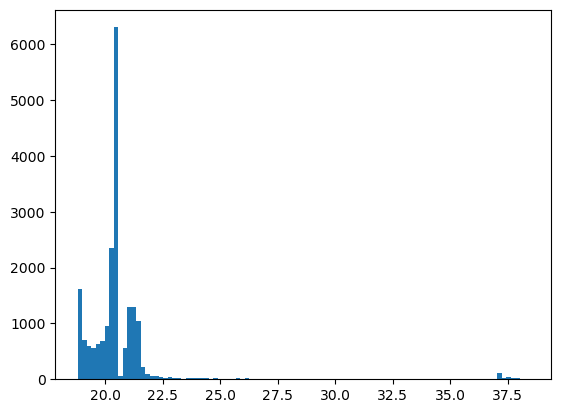

In [7]:
# make a histogram of the continuous_scaled
plt.hist(df['continuous_scaled'], bins=100)
plt.show()


20000
Percentage of almost discrete values: 92.19%


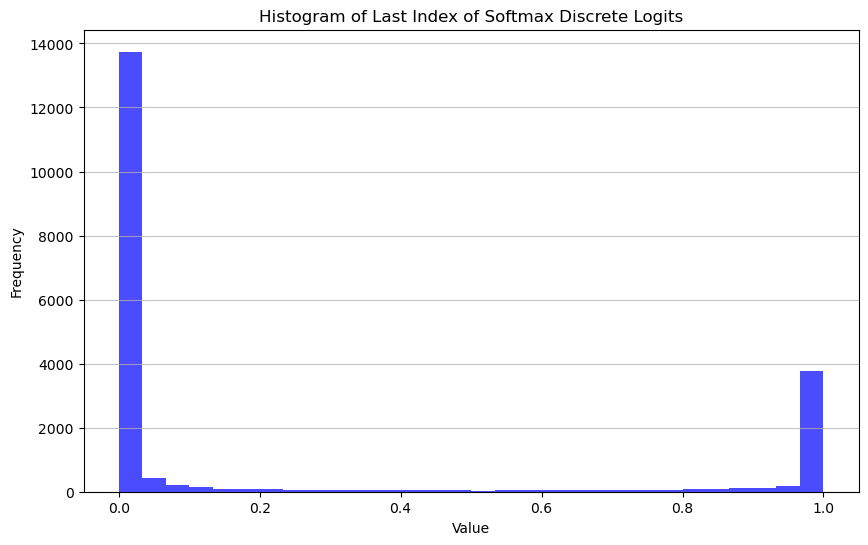

In [8]:
import matplotlib.pyplot as plt

print(len(df))
# Extract the last index of softmax_discrete_logits
last_index_values = df['softmax_discrete_logits'].apply(lambda x: x[-1] if isinstance(x, np.ndarray) and len(x) > 1 else 0)

# Calculate the percentage of values that are almost discrete
almost_discrete_count = ((last_index_values < 0.1) | (last_index_values > 0.9)).sum()
percentage_almost_discrete = (almost_discrete_count / len(last_index_values)) * 100
print(f'Percentage of almost discrete values: {percentage_almost_discrete:.2f}%')

# Calculate percertage smaller than 0.5
percentage_smaller_than_0_5 = (last_index_values < 0.5).sum() / len(last_index_values) * 100
# Create a histogram of the last index values
plt.figure(figsize=(10, 6))
plt.hist(last_index_values, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Last Index of Softmax Discrete Logits')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


25       32.703300
225      53.465034
625      51.773903
1225     48.198050
1825     45.588580
           ...    
17960    57.629143
18460    49.188354
18960    47.560955
19460    33.803547
19860    55.393850
Name: continuous_values, Length: 4907, dtype: float64


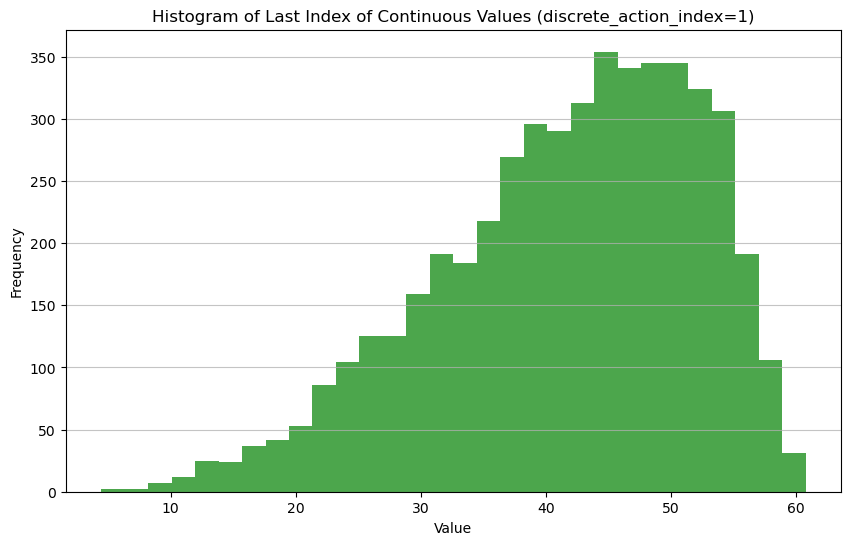

In [9]:
discrete_action_index = 1
value = 'continuous_values'

# Filter the DataFrame for discrete_action_index = 1
filtered_df = df[df['discrete_action_index'] == discrete_action_index]

# Extract the last index of continuous_values after converting the string to a tuple
last_index_continuous_values = filtered_df[value].apply(lambda x: eval(x)[-1] if isinstance(eval(x), tuple) and len(eval(x)) > 1 else 0)
print(last_index_continuous_values)

# Create a histogram of the last index values
plt.figure(figsize=(10, 6))
plt.hist(last_index_continuous_values, bins=30, alpha=0.7, color='green')
plt.title('Histogram of Last Index of Continuous Values (discrete_action_index=1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [3]:
df = load_metrics_files(date='2025_03_18', filename='one_store_fixed_costs/hybrid_policy/1742338049_683_test_data.csv')
# df = load_metrics_files(date='2025_03_11', filename='one_store_fixed_costs/hybrid_policy/1741710362_302_test_data.csv')
# df = load_metrics_files(date='2025_03_11', filename='one_store_fixed_costs/hybrid_policy/1741743750_608_test_data.csv')
# df = load_metrics_files(date='2025_03_02', filename='one_store_fixed_costs/hybrid_policy/1740938929_431_test_metrics.csv')
# df = load_metrics_files(date='2025_02_28', filename='one_store_fixed_costs/hybrid_policy/1740787963_719_test_metrics.csv')
# df = load_metrics_files(date='2025_02_26', filename='one_store_fixed_costs/hybrid_policy/1740593892_53_test_metrics.csv')
# df = load_metrics_files(date='2025_02_26', filename='one_store_fixed_costs/hybrid_policy/1740577006_900_test_metrics.csv')
# df = load_metrics_files(date='2025_02_25', filename='one_store_fixed_costs/hybrid_policy/1740535848_304_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739993263_778_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739998287_368_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739997478_625_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739992488_876_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739989165_590_test_metrics.csv')
# sort by batch_idx then by time_step
df = df.sort_values(by=['batch_idx', 'time_step'])

Loading metrics from: ../metrics/test_trajectories/2025_03_18/one_store_fixed_costs/hybrid_policy/1742338049_683_test_data.csv


In [ ]:
print(100*(37.13 - 37.06)/37.06)

/tmp/ipykernel_49226/669496429.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sampled_df, x='inventory_sum', y='total_action', alpha=0.6, palette='bright', s=30)  # Adjusted size of dots


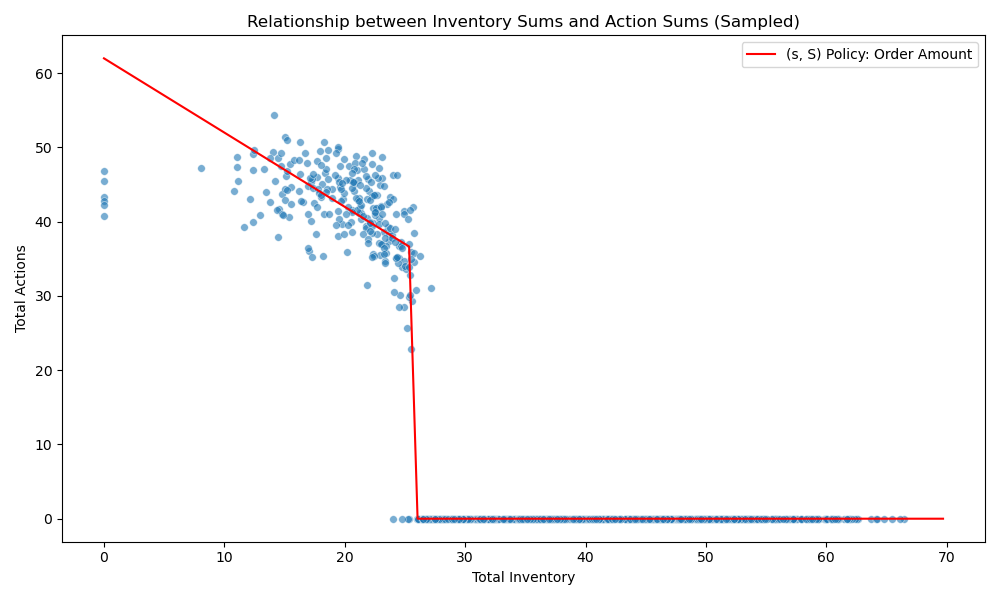

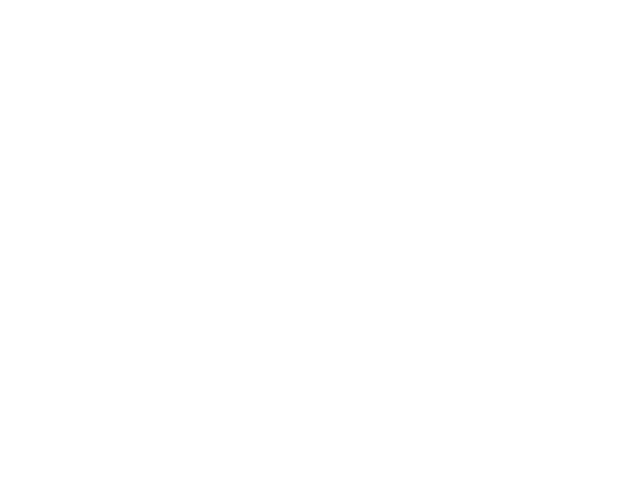

In [4]:
# %matplotlib notebook
%matplotlib ipympl
plt.clf()
# Set up the plot style
plt.figure(figsize=(10, 6))

# Choose a random sub-sample of n points for the plot
n = 1000  # Specify the number of points to sample
sampled_df = df.sample(n=n, random_state=1)  # Randomly sample n points

# Create scatter plot with smaller dots
sns.scatterplot(data=sampled_df, x='inventory_sum', y='total_action', alpha=0.6, palette='bright', s=30)  # Adjusted size of dots
# sns.scatterplot(data=sampled_df, x='inventory_sum', y='total_action', alpha=0.6, palette='bright', s=30)  # Adjusted size of dots
plt.title('Relationship between Inventory Sums and Action Sums (Sampled)')
plt.xlabel('Total Inventory')
plt.ylabel('Total Actions')

# Plot (s, S) policy line
s, S = 26, 62
inventory_range = np.linspace(df['inventory_sum'].min(), df['inventory_sum'].max(), 100)
order_amounts = np.maximum(S - inventory_range, 0) * (inventory_range <= s)

plt.plot(inventory_range, order_amounts, color='red', label='(s, S) Policy: Order Amount')
plt.legend()

plt.tight_layout()
plt.show()

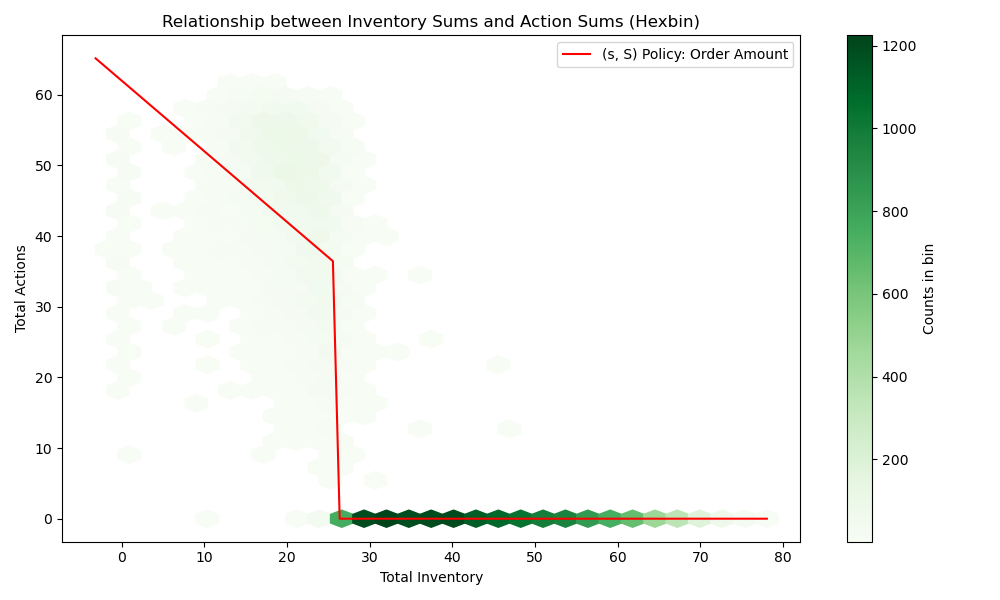

In [13]:
# %matplotlib notebook
%matplotlib ipympl
plt.clf()
# Set up the plot style
plt.figure(figsize=(10, 6))

# Create a hexbin plot to show the density of points
plt.hexbin(df['inventory_sum'], df['total_action'], gridsize=30, cmap='Greens', mincnt=1)
plt.colorbar(label='Counts in bin')

# Plot (s, S) policy line
s, S = 26, 62
inventory_range = np.linspace(df['inventory_sum'].min(), df['inventory_sum'].max(), 100)
order_amounts = np.maximum(S - inventory_range, 0) * (inventory_range <= s)

plt.plot(inventory_range, order_amounts, color='red', label='(s, S) Policy: Order Amount')
plt.title('Relationship between Inventory Sums and Action Sums (Hexbin)')
plt.xlabel('Total Inventory')
plt.ylabel('Total Actions')
plt.legend()

plt.tight_layout()
plt.show()

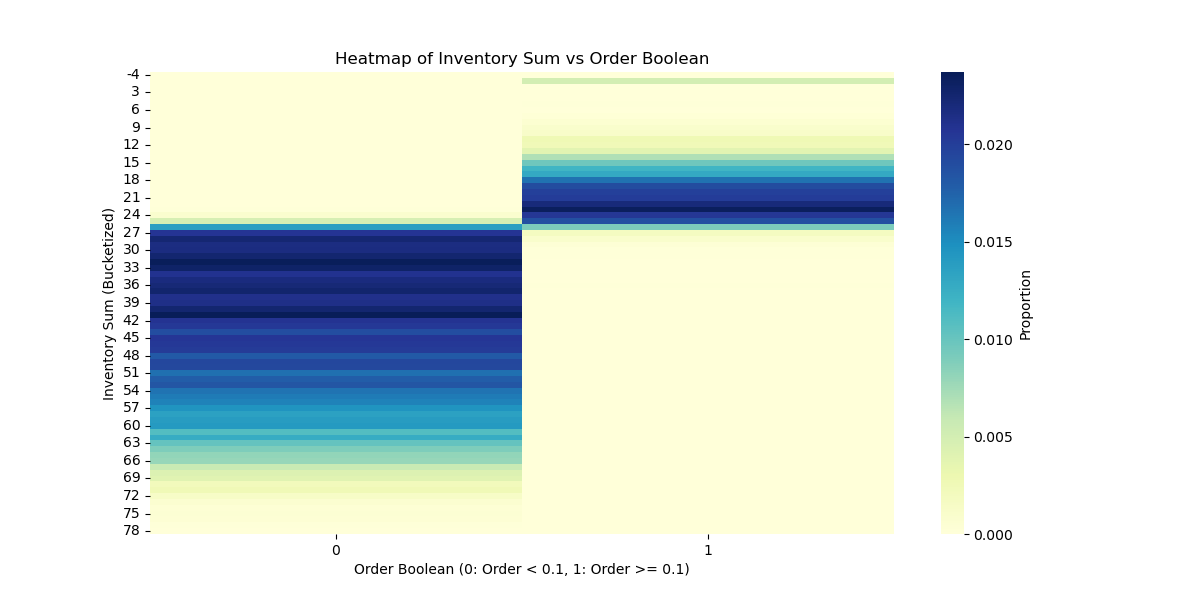

In [14]:
# Create order boolean based on the condition
df['order_boolean'] = (df['total_action'] >= 0.1).astype(int)

# Bucketize inventory_sum into bins of size 1
df['inventory_bucket'] = (df['inventory_sum'] // 1).astype(int)

# Calculate the proportion of pairs for each (inventory_bucket, order_boolean) pair
heatmap_data = df.groupby(['inventory_bucket', 'order_boolean']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.div(heatmap_data.sum().sum(), axis=0)  # Normalize to get proportions across all cells

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Proportion'})  # Remove annotations
plt.title('Heatmap of Inventory Sum vs Order Boolean')
plt.xlabel('Order Boolean (0: Order < 0.1, 1: Order >= 0.1)')
plt.ylabel('Inventory Sum (Bucketized)')
plt.show()


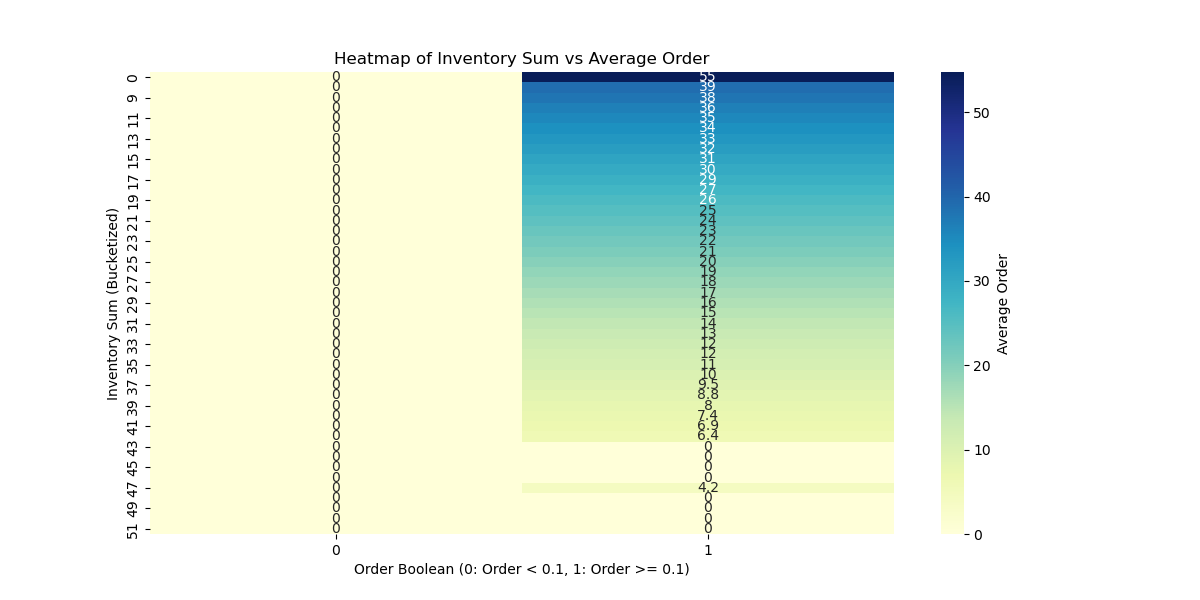

In [21]:
# Calculate the average order for each (inventory_bucket, order_boolean) pair
heatmap_data = df.groupby(['inventory_bucket', 'order_boolean'])['total_action'].mean().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, cbar_kws={'label': 'Average Order'})  # Add annotations for average order
plt.title('Heatmap of Inventory Sum vs Average Order')
plt.xlabel('Order Boolean (0: Order < 0.1, 1: Order >= 0.1)')
plt.ylabel('Inventory Sum (Bucketized)')
plt.show()

In [ ]:
# make a histogram of the inventory_sum
plt.cla()
plt.hist(df['inventory_on_hand'], bins=100)
# plt.hist(df['inventory_sum'], bins=100)
plt.show()
# # make a histogram of the action_sum
# plt.hist(df['total_action_sum'], bins=100)
# plt.show()


In [ ]:
# Calculate correlation
correlation = df.groupby('model_name').apply(lambda x: x['inventory_sum'].corr(x['action_sum']))
print("\nCorrelation between inventory and actions by model:")
print(correlation)

In [ ]:
# Basic statistics
print("\nSummary statistics by model:")
stats = df.groupby('model_name').agg({
    'inventory_sum': ['mean', 'std', 'min', 'max'],
    'action_sum': ['mean', 'std', 'min', 'max']
})
stats